<a href="https://colab.research.google.com/github/ZahidHasanStat/TensorFlow/blob/master/DecisionTreeTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This a demostration of a basic **Decision Tree Algorithm** with python.The **'Titanic'** dataset is used here which is most famous in machine learning.We Built decision tree model to predict survival based on parameters-PClass,Age,Sex,Fare..

**Zahid Hasan**

Department of Statistic

Islamic University 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Reading data
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#droping unnecessary columns
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [7]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833


In [11]:
#defining Target And input variables
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [12]:
target[2]

1

In [14]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [15]:
#Maping Age as numerical values
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [16]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,2,19.0,30.0000
888,3,2,NaN,23.4500
889,1,1,26.0,30.0000


In [17]:
#imputing Missing data
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [19]:

inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [21]:
#spliting the data for validation
from sklearn.model_selection import train_test_split
#Test set=20%
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [24]:
print(len(X_train))
print(len(X_test))

712
179


In [25]:
#importing decision tree classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [26]:
#fitting model
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
#prediction
y=model.predict(X_test)

In [33]:
#checking R score
model.score(X_test,y_test)

0.8156424581005587

In [34]:
#fpr=false positive Rate,tpr=True positive Rate
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

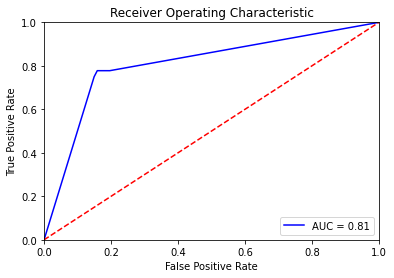

In [35]:
#Plotting Roc And Auc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()